Assignment 1: Insurance Forecast by using Linear Regression

Step 1: Import necessary libraries and load the insurance dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


step 2: Data cleaning

In [74]:
# Check for missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

conclusion: There are no missing / Null values either in columns or rows and zero duplicate values in the dataset.

In [75]:
# generate summary statistics of the dataset.
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [76]:
# Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


 create DUMMY variables for 4 categorical variables 'sex','children','smoker' & 'region'.

In [77]:
# Convert to 'category' data type

df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['children']=df['children'].astype('category')
df['region']=df['region'].astype('category')

In [78]:
# Drop first dummy variable for each set of dummies created.

df_new = pd.get_dummies(df, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   charges           1337 non-null   float64
 3   sex_male          1337 non-null   uint8  
 4   children_1        1337 non-null   uint8  
 5   children_2        1337 non-null   uint8  
 6   children_3        1337 non-null   uint8  
 7   children_4        1337 non-null   uint8  
 8   children_5        1337 non-null   uint8  
 9   smoker_yes        1337 non-null   uint8  
 10  region_northwest  1337 non-null   uint8  
 11  region_southeast  1337 non-null   uint8  
 12  region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 54.8 KB


Splitting the data

In [79]:
# Check the shape before spliting
df.shape

(1337, 7)

In [80]:
from sklearn.model_selection import train_test_split
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [81]:
#Verify the info and shape of the dataframes after split:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 967 to 793
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               935 non-null    int64  
 1   bmi               935 non-null    float64
 2   charges           935 non-null    float64
 3   sex_male          935 non-null    uint8  
 4   children_1        935 non-null    uint8  
 5   children_2        935 non-null    uint8  
 6   children_3        935 non-null    uint8  
 7   children_4        935 non-null    uint8  
 8   children_5        935 non-null    uint8  
 9   smoker_yes        935 non-null    uint8  
 10  region_northwest  935 non-null    uint8  
 11  region_southeast  935 non-null    uint8  
 12  region_southwest  935 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.3 KB


step 3: Data visualization

Exploratory data analysis (EDA)

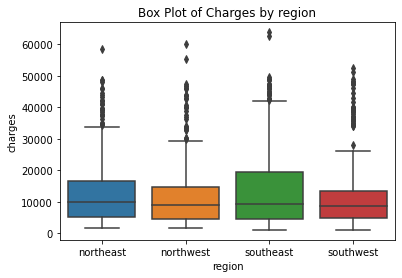

In [82]:
# Box plot of charges by region:
sns.boxplot(x = 'region', y = 'charges', data = df)
plt.title('Box Plot of Charges by region')
plt.show()


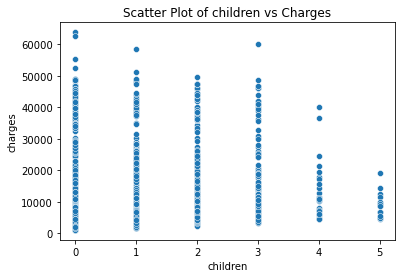

In [83]:
# Scatter plot of children vs charges
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Scatter Plot of children vs Charges')
plt.show()

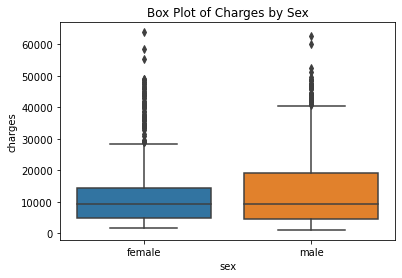

In [84]:
# Box plot of charges by sex:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Box Plot of Charges by Sex')
plt.show()

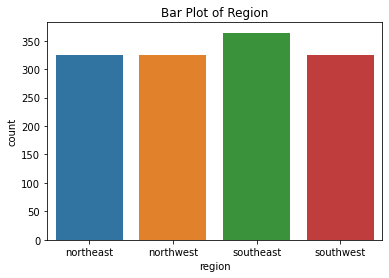

In [85]:
# Count plot of region:
sns.countplot(x='region', data=df)
plt.title('Bar Plot of Region')
plt.show()

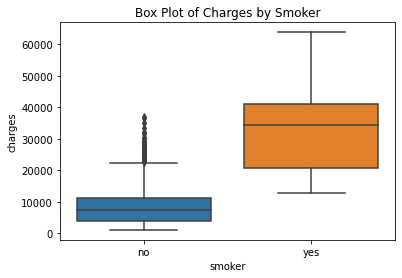

In [86]:
# Box plot of charges by smoker:
sns.boxplot(x = 'smoker', y = 'charges', data =df)
plt.title('Box Plot of Charges by Smoker')
plt.show()

Conclusion

Region: Among all regions, the Southeast has the highest data distribution between the 50th and 75th percentiles.

Sex: Data is biased towards males; data is represented as 50.5: 49.5 for male: female. The male interquartile range is greater than the female interquartile range.

Children: People with two children have the highest data distribution, ranging from the 50th to the 75th percentile.

Smoker: Smokers account for 20.5% of our data. When compared to nonsmokers, the median for smokers is quite high.

step 4: Correlation analysis

<AxesSubplot:>

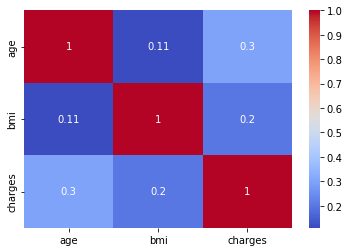

In [87]:
# check for correlations between variables.
df.corr()

# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Conclusion

The heatmap clearly shows which variables are multicollinear and which have high collinearity with the target variable.

In [88]:
#RESCALING THE FEATURE
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
967,44,25.365,7518.02535,1,1,0,0,0,0,0,1,0,0
522,51,33.915,9866.30485,0,0,0,0,0,0,0,0,0,0
155,44,39.520,6948.70080,1,0,0,0,0,0,0,1,0,0
672,36,29.700,4399.73100,1,0,0,0,0,0,0,0,1,0
1173,38,29.260,6457.84340,1,0,1,0,0,0,0,1,0,0


In [89]:
df_train.columns

Index(['age', 'bmi', 'charges', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [90]:
# Apply scaler() to all the numeric variables

num_vars = ['age', 'bmi', 'charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [91]:
# Checking values after scaling
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
967,0.565217,0.253027,0.102096,1,1,0,0,0,0,0,1,0,0
522,0.717391,0.483051,0.139579,0,0,0,0,0,0,0,0,0,0
155,0.565217,0.633844,0.093008,1,0,0,0,0,0,0,1,0,0
672,0.391304,0.369653,0.052321,1,0,0,0,0,0,0,0,1,0
1173,0.434783,0.357815,0.085173,1,0,1,0,0,0,0,1,0,0


In [92]:
df_train.describe()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.455917,0.395529,0.196028,0.504813,0.232086,0.185027,0.111230,0.022460,0.009626,0.204278,0.238503,0.271658,0.253476
std,0.307277,0.165431,0.197634,0.500244,0.422389,0.388527,0.314585,0.148253,0.097689,0.403389,0.426396,0.445052,0.435234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.275491,0.054361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.130615,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.507735,0.261152,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


step 5: BUILDING A LINEAR MODEL

In [93]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('charges')
X_train = df_train

In [94]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Load your data into X_train and y_train

# Initialize a LinearRegression object
lm = LinearRegression()

# Initialize RFE object with 6 features
rfe = RFE(estimator=lm, n_features_to_select=6)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [96]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('sex_male', False, 7),
 ('children_1', False, 6),
 ('children_2', True, 1),
 ('children_3', False, 2),
 ('children_4', True, 1),
 ('children_5', True, 1),
 ('smoker_yes', True, 1),
 ('region_northwest', False, 5),
 ('region_southeast', False, 4),
 ('region_southwest', False, 3)]

In [97]:
col=X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children_2', 'children_4', 'children_5', 'smoker_yes'], dtype='object')

In [98]:
X_train.columns[~rfe.support_]

Index(['sex_male', 'children_1', 'children_3', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [99]:
#Dividing into X_test and y_test¶
y_test = df_test.pop('charges')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1164
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    int64  
 1   bmi               402 non-null    float64
 2   sex_male          402 non-null    uint8  
 3   children_1        402 non-null    uint8  
 4   children_2        402 non-null    uint8  
 5   children_3        402 non-null    uint8  
 6   children_4        402 non-null    uint8  
 7   children_5        402 non-null    uint8  
 8   smoker_yes        402 non-null    uint8  
 9   region_northwest  402 non-null    uint8  
 10  region_southeast  402 non-null    uint8  
 11  region_southwest  402 non-null    uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 13.3 KB


In [100]:
# Fit the model on the training set
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
# Make predictions on the test set
y_pred = lm.predict(X_test)

In [102]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [103]:
# Calculate the MAE, RMSE, and MSE using scikit-learn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

In [104]:
# Print the evaluation metrics
print('MAE:', mae)
print('RMSE:', rmse)
print('MSE:', mse)

MAE: 12978.280102730212
RMSE: 17306.86348847332
MSE: 299527523.8086508


Conclusion

The Mean Absolute Error (MAE) of 12978.28 indicates that the linear regression model is off by $12,978 on average when predicting the target variable.

The standard deviation of the residuals (errors) is $17,306.86 based on the Root Mean Squared Error (RMSE) of 17306.86. This is a measure of how evenly distributed the errors are.

The MSE of 299527523.81 represents the average of the squared differences between the predicted and actual values. A higher MSE value indicates a higher level of error in the model's predictions.

Overall, the model's performance is poor, as evidenced by the high MAE, RMSE, and MSE values. This indicates that the model may not be a good fit for the data, or that additional features may be required.

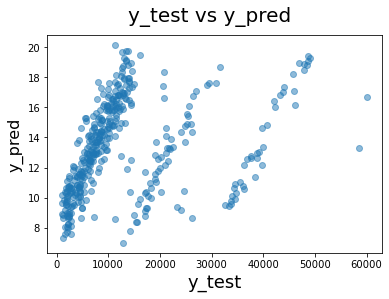

In [105]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()